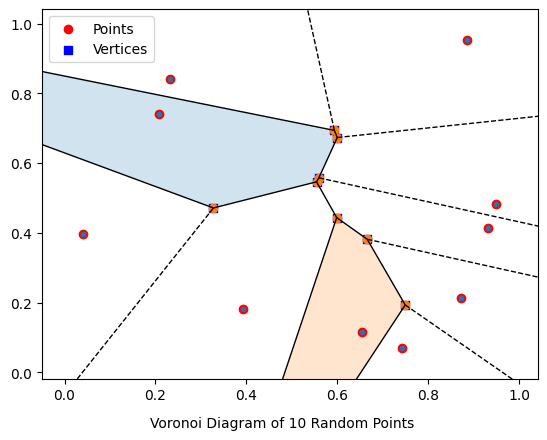

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

np.random.seed(1000)

# Specify the number of points
num_points = 10

# Generate random points
points = np.random.rand(num_points, 2)

# Compute the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)

# Access the regions
for region in vor.regions:
    if not -1 in region:  # Exclude the outer region
        polygon = vor.vertices[region]
        plt.fill(*zip(*polygon), alpha=0.2)  # Fill the region

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='red', label='Points')

# Plot the vertices
plt.scatter(vor.vertices[:, 0], vor.vertices[:, 1], color='blue', marker='s', label='Vertices')

# Add a legend
plt.legend()

# Add a caption
caption = f"Voronoi Diagram of {num_points} Random Points"
plt.figtext(0.5, 0.01, caption, ha='center', fontsize=10)

plt.show()


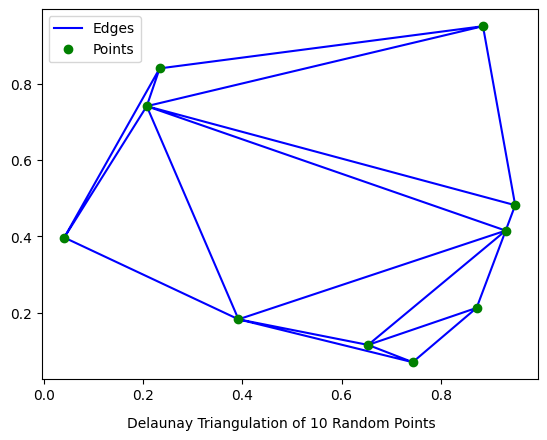

In [5]:
from scipy.spatial import Delaunay

# Compute the Delaunay triangulation
tri = Delaunay(points)

# Plot the Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices, 'b-', label='Edges')
plt.plot(points[:, 0], points[:, 1], 'go', label='Points')

# Add a legend
plt.legend()

# Add a caption
caption = f"Delaunay Triangulation of {num_points} Random Points"
plt.figtext(0.5, 0.01, caption, ha='center', fontsize=10)

plt.show()

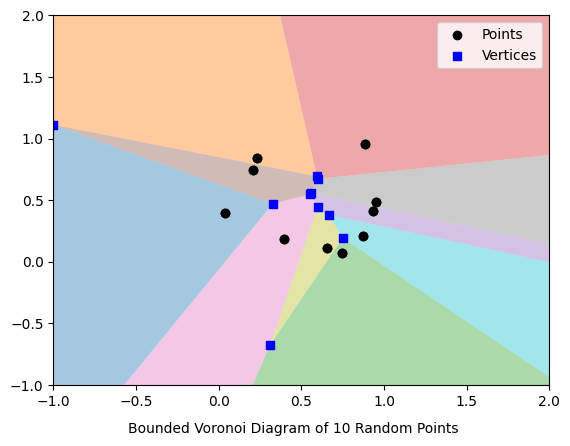

In [8]:
# Add points for a large rectangle around the data
extra_points = np.array([[x, y] for x in [-100, 100] for y in [-100, 100]])
points_with_boundary = np.concatenate([points, extra_points])

# Compute Voronoi diagram
vor = Voronoi(points_with_boundary)

# Remove the extra points
finite_regions = [region for region in vor.regions if -1 not in region and len(region) > 0]
finite_points = [vor.vertices[region] for region in finite_regions]

# Plot
for region in finite_points:
    plt.fill(*zip(*region), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.xlim(-1, 2)
plt.ylim(-1,2)

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='black', label='Points')

# Plot the vertices
plt.scatter(vor.vertices[:, 0], vor.vertices[:, 1], color='blue', marker='s', label='Vertices')

# Add a legend
plt.legend()

# Add a caption
caption = f"Bounded Voronoi Diagram of {num_points} Random Points"
plt.figtext(0.5, 0.01, caption, ha='center', fontsize=10)

plt.show()


In [9]:
finite_regions

[[9, 5, 0, 3, 8],
 [10, 6, 5, 9],
 [12, 7, 1, 4, 11],
 [15, 2, 6, 10, 13],
 [21, 17, 16, 18, 19, 20],
 [17, 13, 10, 9, 8, 16],
 [18, 11, 4, 3, 8, 16],
 [21, 14, 15, 13, 17],
 [19, 12, 11, 18],
 [20, 7, 12, 19]]

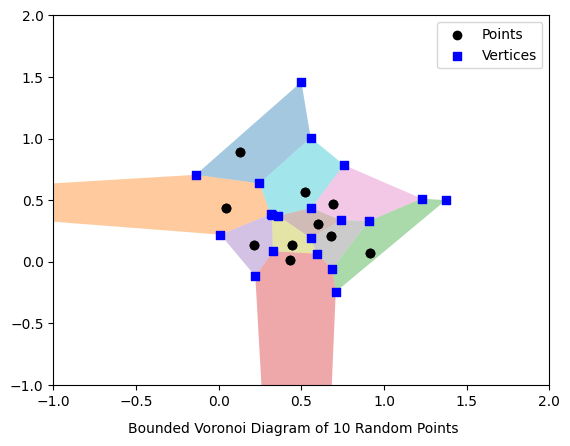

In [11]:
import numpy as np
from scipy.spatial import Voronoi

def compute_voronoi_with_boundaries(points, boundary_points, plot=False):
    # Add the boundary points to the input points
    points_with_boundary = np.concatenate([points, boundary_points])

    # Compute Voronoi diagram
    vor = Voronoi(points_with_boundary)

    # Remove the extra points and filter out infinite regions
    finite_regions = [region for region in vor.regions if -1 not in region and len(region) > 0]
    finite_points = [vor.vertices[region] for region in finite_regions]

    if plot:
        # Plot
        for region in finite_points:
            plt.fill(*zip(*region), alpha=0.4)

        plt.plot(points[:, 0], points[:, 1], 'ko')
        plt.xlim(-1, 2)
        plt.ylim(-1,2)

        # Plot the points
        plt.scatter(points[:, 0], points[:, 1], color='black', label='Points')

        # Plot the vertices
        plt.scatter(vor.vertices[:, 0], vor.vertices[:, 1], color='blue', marker='s', label='Vertices')

        # Add a legend
        plt.legend()

        # Add a caption
        caption = f"Bounded Voronoi Diagram of {num_points} Random Points"
        plt.figtext(0.5, 0.01, caption, ha='center', fontsize=10)

        plt.show()

    return vor, finite_points, finite_regions

# Example usage
points = np.random.rand(10, 2)
boundary_points = np.array([[0, 1, 1, 0], [0, 0, 1, 1]]).T
vor, finite_points, finite_regions = compute_voronoi_with_boundaries(points, boundary_points, plot=True)


In [20]:
finite_regions, vor.point_region, vor.points, vor.vertices.shape

([[5, 3, 2, 4],
  [8, 1, 2, 3, 6],
  [14, 11, 10, 9, 13],
  [16, 7, 0, 10, 11, 15],
  [17, 6, 8, 7, 16],
  [21, 19, 18, 20],
  [20, 12, 13, 14, 18],
  [19, 15, 11, 14, 18],
  [21, 17, 16, 15, 19],
  [21, 17, 6, 3, 5, 12, 20]],
 array([ 8, 11,  1,  7,  3, 10, 12, 14, 13,  9,  4,  5,  6,  2]),
 array([[0.43249917, 0.0181432 ],
        [0.69143786, 0.46969065],
        [0.12822219, 0.89133705],
        [0.91820362, 0.07312099],
        [0.04544794, 0.4385729 ],
        [0.60172093, 0.31022703],
        [0.68190824, 0.20901315],
        [0.5196043 , 0.56598883],
        [0.44116739, 0.13755616],
        [0.21354319, 0.13337189],
        [0.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 1.        ],
        [0.        , 1.        ]]),
 (22, 2))

In [21]:
vor.regions

[[],
 [5, 3, 2, 4],
 [4, -1, 1, 2],
 [8, 1, 2, 3, 6],
 [8, 1, -1, 0, 7],
 [10, 0, -1, 9],
 [13, 9, -1, 4, 5, 12],
 [14, 11, 10, 9, 13],
 [16, 7, 0, 10, 11, 15],
 [17, 6, 8, 7, 16],
 [21, 19, 18, 20],
 [20, 12, 13, 14, 18],
 [19, 15, 11, 14, 18],
 [21, 17, 16, 15, 19],
 [21, 17, 6, 3, 5, 12, 20]]

In [36]:
finite_regions[vor.point_region[0]]

[21, 17, 16, 15, 19]

In [43]:
len(finite_points), vor.vertices.shape

(10, (22, 2))

In [44]:
v_count = 0
for point in finite_points:
    v_count += point.shape[0]
v_count

51

In [46]:
finite_points[0].shape[0]

4

In [48]:
vor.vertices[[21, 17, 16, 15, 19],0]

array([0.36025937, 0.32284886, 0.32826951, 0.59323482, 0.5560742 ])